In [22]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            # Env variables
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("roboflow_api_key")
os.environ["MODEL_CACHE_DIR"] = "./model_cache"

import cv2
from inference.models.utils import get_model

# Confirm that the API key is set
if api_key == None:
    print("Please set the API key in the .env file")


[11/13/24 10:22:17] WARNING  Your inference package version 0.26.0 is out of date! Please upgrade to ]8;id=3801;file:///home/decaf/Projects/Classes/CS5330/Bookshelf-Scanner/.venv/lib/python3.11/site-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=572714;file:///home/decaf/Projects/Classes/CS5330/Bookshelf-Scanner/.venv/lib/python3.11/site-packages/inference/core/__init__.py#41\41]8;;\
                             version 0.26.1 of inference for the latest features and bug fixes by                  
                             running `pip install --upgrade inference`.                                            

In [48]:
# Roboflow model
model_name = "open-shelves"
model_version = "8"
model = get_model(model_id = f"{model_name}/{model_version}", api_key=api_key)
model.confidence = 0.3
model.overlap = 0.7


In [11]:
from io import BytesIO

import requests
import supervision as sv
from inference import get_model
from PIL import Image
from PIL.ImageFile import ImageFile


def load_image_from_url(url: str) -> ImageFile:
    response = requests.get(url)
    response.raise_for_status()  # check if the request was successful
    image = Image.open(BytesIO(response.content))
    return image

def load_image_from_path(path: str) -> ImageFile:
    image = Image.open(path)
    return image

In [50]:
def display_image_with_detections(image, detections):

    # create supervision annotators
    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    mask_annotator = sv.MaskAnnotator()

    # annotate the image with our inference results
    annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)
    annotated_image = mask_annotator.annotate(scene=annotated_image, detections=detections)

    # display the image
    sv.plot_image(annotated_image)

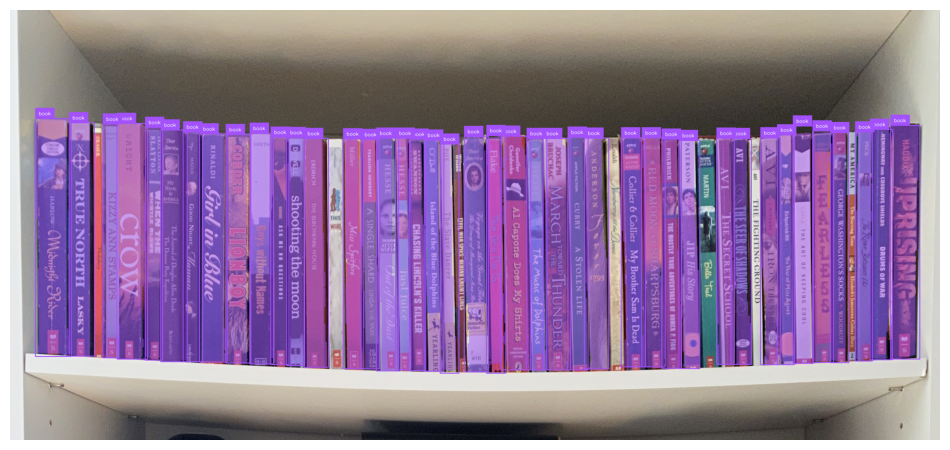

In [51]:


# load the image from an url
image = load_image_from_path("../../images/Shelves/1538_1.jpg")

# run inference on our chosen image, image can be a url, a numpy array, a PIL image, etc.
results = model.infer(image)[0]
# load the results into the supervision Detections api
detections = sv.Detections.from_inference(results)

# display the image with the inference results
display_image_with_detections(image, detections)

In [55]:
def segment_books_by_bounding_box(image):
    # Get the bounding boxes
    bounding_boxes = [d[0] for d in detections]

    # Sort the bounding boxes by x1
    bounding_boxes.sort(key=lambda x: x[0])

    from matplotlib import pyplot as plt

    books = []

    # Segment the image using cv2
    for box in bounding_boxes:
        x1, y1, x2, y2 = box
        book = image.crop((x1, y1, x2, y2))
        books.append(book)
    return books

def segment_books_by_mask(image):
    # Get the masks
    masks = [d[2] for d in detections]

    # Sort the masks by x1
    masks.sort(key=lambda x: x[0])

    from matplotlib import pyplot as plt

    books = []

    # Segment the image using cv2
    for mask in masks:
        book = image.copy()
        book.putalpha(mask)
        books.append(book)
    return books

def display_segmented_books(books):
    import matplotlib.pyplot as plt
    # Display the segmented images
    fig, axes = plt.subplots(1, len(books), figsize=(20, 10))
    for i, book in enumerate(books):
        axes[i].imshow(book)
        axes[i].axis("off")
    plt.show()



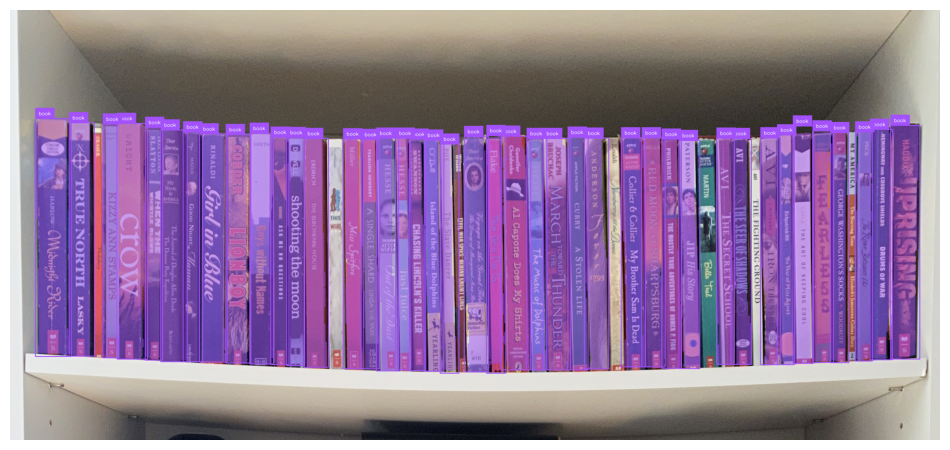

IndexError: invalid index to scalar variable.

In [56]:
filenames = os.listdir("../../images/Shelves")
for filename in filenames:
    image = load_image_from_path(f"../../images/Shelves/{filename}")
    results = model.infer(image)[0]
    detections = sv.Detections.from_inference(results)
    display_image_with_detections(image, detections)
    books = segment_books_by_mask(image)
    display_segmented_books(books)

In [72]:

masks = [d[1] for d in detections]
from matplotlib import pyplot as plt

books = []

# Segment the image using cv2
for mask in masks:
    book = image.copy()
    book.putalpha(mask)
    books.append(book)

TypeError: only integer scalar arrays can be converted to a scalar index

In [73]:
print(mask_annotator)